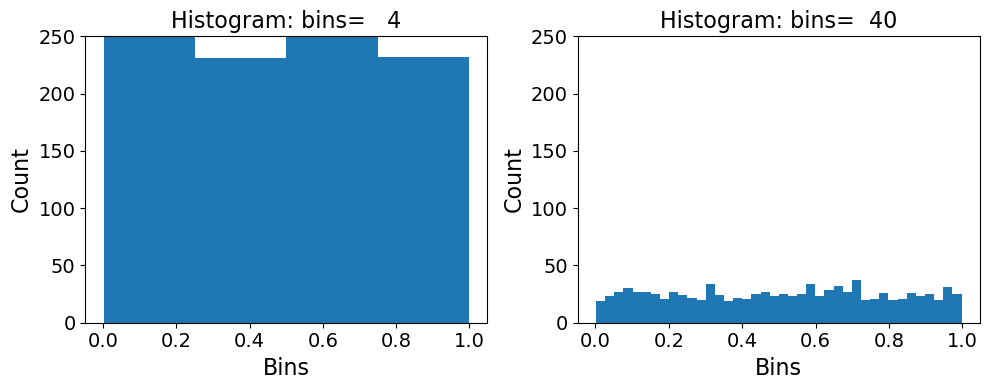

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.rand(1000, 1)
z = np.random.rand(1000, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis="both", which="major", labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)
ax[1].hist(z, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis="both", which="major", labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)
plt.savefig("histograms_uniform.png")
plt.tight_layout()

1. Though the data is from a uniform distribution, the histogram does not appear flat. Why?

Because the data is random. A uniform distribution would require exactly the same number of values in each bucket, which by definition is not random. 

2. Every time you run it, the histogram looks slightly different? Why?

Because the data is random.

3. How do the above observations change (if so how) if you had started with more data?

As the bucket count is reduced, or the number of values in each bucket is increased (with more initial values), the number of values in each bucket tends towards the theoretical distribution. 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 7.000e+00, 2.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 9.000e+00, 1.500e+01, 1.300e+01,
        1.500e+01, 1.100e+01, 1.700e+01, 2.300e+01, 1.100e+01, 2.300e+01,
        3.500e+01, 3.500e+01, 5.200e+01, 5.700e+01, 6.000e+01, 5.200e+01,
        5.500e+01, 6.000e+01, 1.010e+02, 1.020e+02, 1.090e+02, 1.280e+02,
        1.370e+02, 1.450e+02, 1.780e+02, 1.660e+02, 1.830e+02, 2.110e+02,
        2.430e+02, 2.730e+02, 3.010e+02, 2.850e+02, 3.220e+02, 3.650e+02,
        3.840e+02, 4.020e+02, 4.550e+02, 4.690e+02, 5.420e+02, 5.800e+02,
        5.850e+02, 6.480e+02, 6.750e+02, 7.610e+02, 8.360e+02, 8.470e+02,
        9.140e+02, 9.140e+02, 1.022e+03, 9.960e+02, 1.065e+03, 1.101e+03,
        1.181e+03, 1.178e+03, 1.264e+0

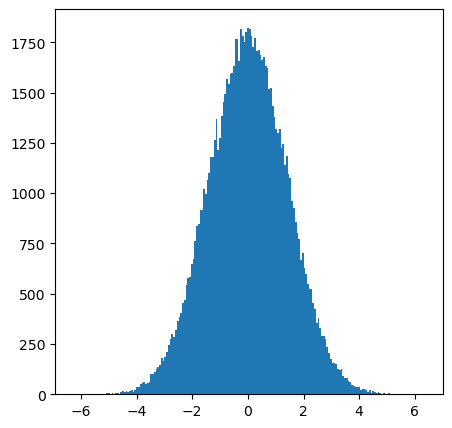

In [9]:
N=100000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 200)

In [ ]:
1. What do you observe? 

The distribution of the subtraction of one random number from another over many pairs forms a Gaussian (normal) distribution.

2. How does the resulting histogram change when you change the number of uniform random numbers you add and subtract?

The distribution becomes smoother.

3. Is there a theory that explains your observation?

Each np.sum(np.random.rand(12,1)) is the sum of 12 random numbers, a Gaussian distribution mean 6 and variance 1. The sum is also Gaussian. 
The sum of independent uniform random variables approaches a normal distribution by the Central Limit Theorem.

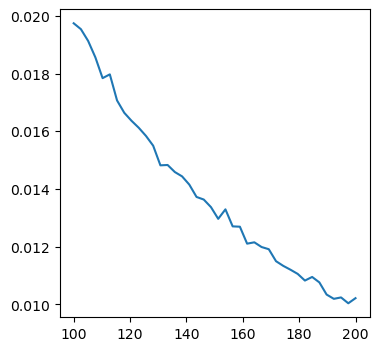

In [3]:
MaxTrial = 10000
sampleSizeRange = np.linspace(100, 200, 40) # 40 evenly spaced numbers between 100 and 200
plotVar = np.zeros(len(sampleSizeRange)) # empty array of 40 numbers

for sSize in range(len(sampleSizeRange)): # for each sample
    numSamples = int(sampleSizeRange[sSize]) # get the number of samples
    vStrial = np.zeros(MaxTrial) # array of 10000 zeros
    for trial in range(MaxTrial): # for each of 10000 trials
        xx = np.random.randn(numSamples, 1) # sample of random values from Gaussian distribution
        vStrial[trial] = np.var(xx) # calculate the variance of the trial 
    plotVar[sSize] = np.var(vStrial) # calculate the variance of the sample 
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(sampleSizeRange, plotVar)

In [6]:
def gauss2D(x, m, C): # x is a vector of a point, m is the mean, and C is the covariance matrix.
    Ci = np.linalg.inv(C) # computes the inverse of C, which is used to describe the spread and orientation of the distribution.
    dC = np.linalg.det(C) # computes the determinant of C
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m)))) # The numerator encodes the Mahalanobis distance between the point and the mean, weighted by the covariance.
    den = np.sqrt((2 * np.pi)**2 * dC) # normalise so that total probability is 1
    return num / den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing="ij")
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

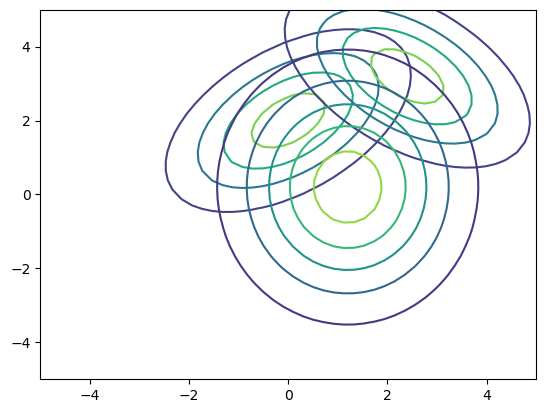

In [44]:
# Plot contours
nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)
m1 = np.array([1.2,0.2])
C1 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

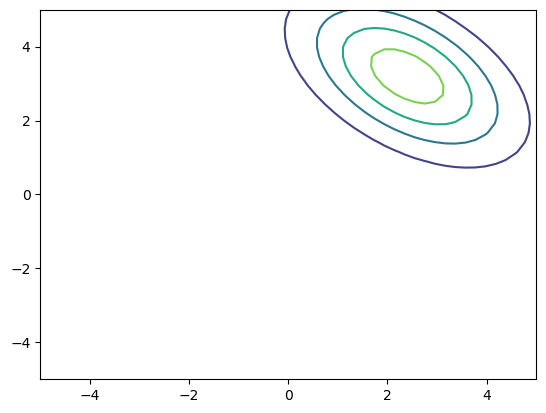

In [8]:
# Plot contours with m = [2.4,3.2] and C = [[2,-1],[-1,2]]
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

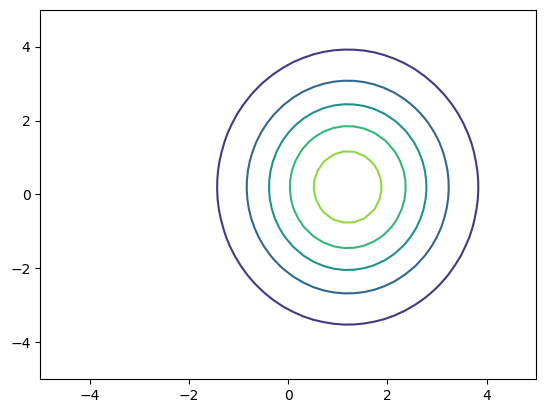

In [9]:
nx, ny = 50, 40
m1 = np.array([1.2,0.2])
C1 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

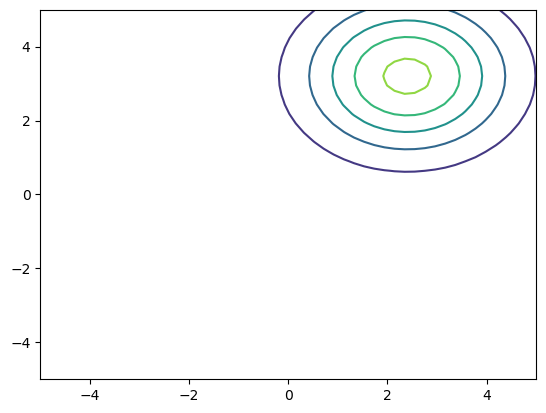

In [10]:
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

In [40]:
# factorize the covariance matrix into a lower triangular matrix and its transpose, C = AAT 
# multiply to see if the factorization is correct:
C = np.array([[2.0,1.0], [1.0,2.0]])
A = np.linalg.cholesky(C) # A is the lower triangular matrix
print(A)
print(A @ A.T)

[[1.41421356 0.        ]
 [0.70710678 1.22474487]]
[[2. 1.]
 [1. 2.]]


(np.float64(-4.3805775572732015),
 np.float64(3.6763864232350594),
 np.float64(-3.972724266635394),
 np.float64(4.069566457415771))

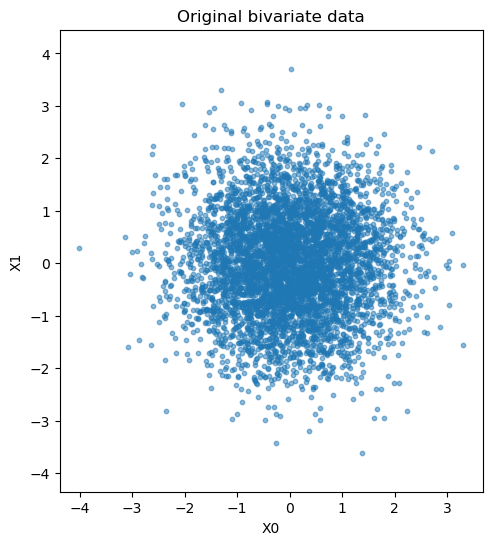

In [46]:
X = np.random.randn(5000, 2)
Y = X @ A.T
# draw the plot of X
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], alpha=0.5, s=10)
plt.title("Original bivariate data")
plt.xlabel("X0")
plt.ylabel("X1")
plt.axis("equal")

(np.float64(-6.195072192522965),
 np.float64(5.199195540263334),
 np.float64(-5.590130465718701),
 np.float64(5.038559104939724))

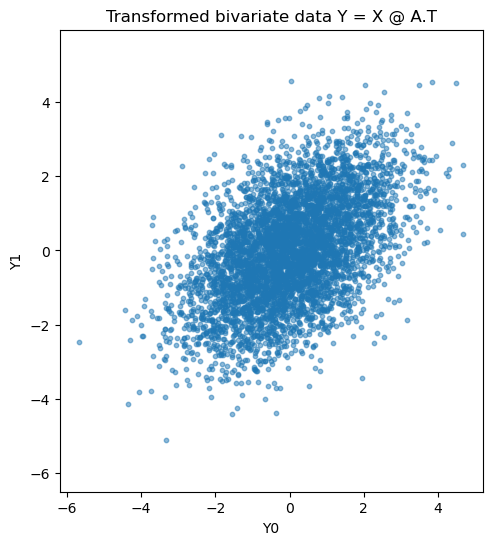

In [47]:
# draw the plot of Y
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Y[:,0], Y[:,1], alpha=0.5, s=10)
plt.title("Transformed bivariate data Y = X @ A.T")
plt.xlabel("Y0")
plt.ylabel("Y1")
plt.axis("equal")

In [20]:
# construct a vector u = [sin θ, cos θ]T, parameterized by the variable θ
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("the vector: ", u)
print("magnitude is:", np.sqrt(u[0]**2 + u[1]**2))
print("angle is:", theta * 180 / np.pi)

the vector:  [np.float64(0.8660254037844386), np.float64(0.5000000000000001)]
magnitude is: 1.0
angle is: 59.99999999999999


In [22]:
# compute the variance of projected data along this direction
yp = Y @ u
print(yp.shape)
print("projected variance:", np.var(yp))

(5000,)
projected variance: 2.878261246271206


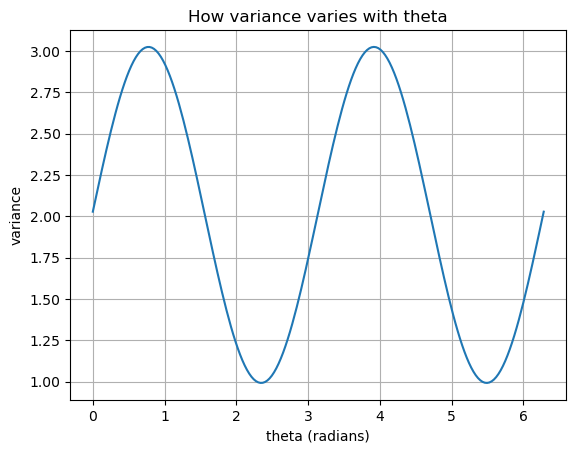

In [29]:
def calc_variance(theta):
    u = [np.sin(theta), np.cos(theta)]
    return np.var(Y @ u)

theta_values = np.linspace(0, 2*np.pi, 200)

variance_values = [calc_variance(theta) for theta in theta_values]

plt.plot(theta_values, variance_values)
plt.xlabel("theta (radians)")
plt.ylabel("variance")
plt.title("How variance varies with theta")
plt.grid(True)

1. What are the maxima and minima of the plot?

Maximum of approx 3, minimum of 1

In [42]:
# compute the eigenvalues and eigenvecotrs of the covariance matrix C
eigenvalues, eigenvectors = np.linalg.eig(C)

print("eigenvalues are: ", eigenvalues)
print("eigenvectors are:", eigenvectors)

eigenvalues are:  [3. 1.]
eigenvectors are: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


2. can you see a relationship between the eigenvalues and eigenvectors and the maxima and minima
of the way the projected variance changes?

Yes, the eigenvalues are the same as the maxima and minima of the plot, or the largest eigenvalue of C is the same as the maximum variance, and the smallest eigenvalue is the same as the minimum variance.

3. The shape of the graph might have looked sinusoidal for this two dimensional problem. Can you analytically confirm if this might be true?

On a unit circle, the covariance matrix C describes the transformation (stretch/shear) as a vector x (described by theta) traverses the circle. The eigenvectors are orthogonal and define the new axes of the transformation, and the direction of maximum variance. The eigenvalues indicate the amount of variance along each corresponding eigenvector. As theta varies between 0 and 2pi, the variance will change sinusoidally as theta aligns with the eigenvectors.